In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import numpy as np
from sklearn.decomposition.pca import PCA
import matplotlib
#matplotlib.use('TkAgg')
import matplotlib.pyplot as plt


In [3]:
# Load data
train = pd.read_csv('train.csv', index_col='id')
test = pd.read_csv('test.csv', index_col='id')

# without dropping id column
#test = pd.read_csv('test.csv')

#sample = pd.read_csv('sampleSubmission.csv')
targets = train['target']
train = train.drop('target', axis=1)
unlabeled_train = np.concatenate((train, test), axis=0)
#test.head(10)

In [4]:
unlabeled_train.shape

(206246, 93)

In [6]:
pca_2dim = PCA(n_components=10, whiten =True)
pca_2dim.fit(unlabeled_train)
#unlabeled_train_2dim = pca_20dim.transform(unlabeled_train)
#unlabeled_train_2dim.shape

PCA(copy=True, n_components=10, whiten=True)

In [7]:
unlabeled_train_2dim = pca_2dim.transform(unlabeled_train)
unlabeled_train_2dim.shape
pca_2dim.explained_variance_ratio_ 

array([ 0.1179096 ,  0.08569373,  0.06490702,  0.06226667,  0.04348501,
        0.03969168,  0.03432732,  0.03131091,  0.02953881,  0.02814053])

In [11]:
## demonstrate the eigenvalues ##
#pca_20dim = PCA(n_components=90, whiten =True)
#pca_20dim.fit(unlabeled_train)
#pca_20dim.explained_variance_ratio_ 

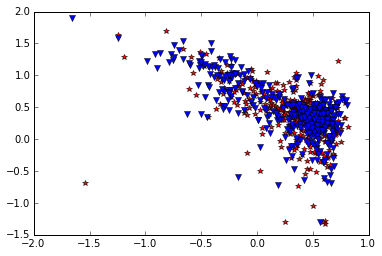

In [8]:
#targets.head(2)
index_1 = np.argwhere(targets=='Class_1')[:, 0]
index_2 = np.argwhere(targets=='Class_2')[:, 0]
index_3 = np.argwhere(targets=='Class_3')[:, 0]

element_class_1 = unlabeled_train_2dim[index_1, :][0:500]
element_class_2 = unlabeled_train_2dim[index_2, :][0:500]
element_class_3 = unlabeled_train_2dim[index_3, :][0:500]

#element_class_1.size
plt.figure()
#plt.plot(element_class_1[:, 0], element_class_1[:, 1], "yo")
plt.plot(element_class_2[:, 0], element_class_2[:, 1], "r*")
plt.plot(element_class_3[:, 0], element_class_3[:, 1], "bv")

plt.savefig('foo.pdf', bbox_inches='tight')


((array([ -2.99209858e+00,  -2.71015927e+00,  -2.55162541e+00,
          -2.43921385e+00,  -2.35113311e+00,  -2.27822091e+00,
          -2.21572267e+00,  -2.16084152e+00,  -2.11178767e+00,
          -2.06734403e+00,  -2.02664403e+00,  -1.98904794e+00,
          -1.95406954e+00,  -1.92133033e+00,  -1.89052965e+00,
          -1.86142459e+00,  -1.83381593e+00,  -1.80753820e+00,
          -1.78245240e+00,  -1.75844061e+00,  -1.73540186e+00,
          -1.71324904e+00,  -1.69190643e+00,  -1.67130780e+00,
          -1.65139483e+00,  -1.63211595e+00,  -1.61342528e+00,
          -1.59528183e+00,  -1.57764883e+00,  -1.56049314e+00,
          -1.54378481e+00,  -1.52749667e+00,  -1.51160399e+00,
          -1.49608418e+00,  -1.48091659e+00,  -1.46608224e+00,
          -1.45156367e+00,  -1.43734479e+00,  -1.42341071e+00,
          -1.40974764e+00,  -1.39634279e+00,  -1.38318426e+00,
          -1.37026095e+00,  -1.35756253e+00,  -1.34507932e+00,
          -1.33280226e+00,  -1.32072287e+00,  -1.308833

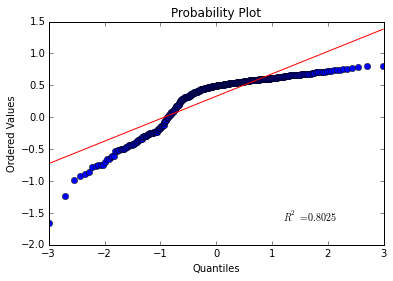

In [9]:
from scipy.stats import probplot
probplot(element_class_3[:, 0], dist='norm', plot=plt)